# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model]() or a linear model like [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) or [Ridge Regressors](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ridge_regression.html).
        - An advanced regressor of your choice (e.g., Bagging, Boosting, SVR, etc.). TIP: select a tree-based method such that it does not take too long to run SHAP further below. 

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Place the files in the ../../05_src/data/fires/ directory and load the appropriate file. 

In [25]:
import pandas as pd

In [26]:
# Load data
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
fires_dt = (pd.read_csv('C:/Users/Test/production/05_src/data/fires/forestfires.csv', header = 0, names = columns))
fires_dt.info()

# display first few rows
fires_dt.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coord_x  517 non-null    int64  
 1   coord_y  517 non-null    int64  
 2   month    517 non-null    object 
 3   day      517 non-null    object 
 4   ffmc     517 non-null    float64
 5   dmc      517 non-null    float64
 6   dc       517 non-null    float64
 7   isi      517 non-null    float64
 8   temp     517 non-null    float64
 9   rh       517 non-null    int64  
 10  wind     517 non-null    float64
 11  rain     517 non-null    float64
 12  area     517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


,coord_x,coord_y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


# Get X and Y

Create the features data frame and target data.

In [27]:
# Define features (X) and target (Y)
x = fires_dt.drop(columns=['area'])     # <-- drop the target from features
y = fires_dt['area']                    # <-- Set the target 

In [28]:
# Display the first few rows of X (features)
x.head()

# Display the first few rows of y (target)
y.head()


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: area, dtype: float64

# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define columns
num_cols = ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
cat_cols = ['month', 'day'] 

# Preproc 1 
preproc1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)]) 


### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
import numpy as np

# Define log transformer for skewed variables 
log_transformer = FunctionTransformer(np.log1p, validate=True)

# Preproc 2
preproc2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),             # Standard scaling for num cols
        ('log', log_transformer, ['dc', 'isi']),         # Log transformation for skewed cols
        ('cat', OneHotEncoder(), cat_cols)])             # One-hot for cat columns




## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [31]:
# Pipeline A = preproc1 + baseline

from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

# Define Pipeline A 
pipeline_A = Pipeline([
    ('preprocessing', preproc1),
    ('regressor', Ridge())]) 

# Verify 
print("Pipeline A", pipeline_A)

Pipeline A Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat', OneHotEncoder(),
                                                  ['month', 'day'])])),
                ('regressor', Ridge())])


In [32]:
# Pipeline B = preproc2 + baseline
# Define Pipeline B 
pipeline_B = Pipeline([
    ("preprocessing", preproc2), 
    ('regressor', Ridge())])

# Verify
print("Pipeline B", pipeline_B)

Pipeline B Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('log',
                                                  FunctionTransformer(func=<ufunc 'log1p'>,
                                                                      validate=True),
                                                  ['dc', 'isi']),
                                                 ('cat', OneHotEncoder(),
                                                  ['month', 'day'])])),
                ('regressor', Ridge())])


In [33]:
# Pipeline C = preproc1 + advanced model

from sklearn.ensemble import GradientBoostingRegressor

# Define pipeline C
pipeline_C = Pipeline([
    ('preprocessing', preproc1),
    ('regressor', GradientBoostingRegressor())])

# Verify
print("Pipeline C", pipeline_C)



Pipeline C Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat', OneHotEncoder(),
                                                  ['month', 'day'])])),
                ('regressor', GradientBoostingRegressor())])


In [34]:
# Pipeline D = preproc2 + advanced model
# Define pipeline D
pipeline_D = Pipeline([
    ('preprocessing', preproc2),
    ('regressor', GradientBoostingRegressor())])

# Verify
print("Pipeline D", pipeline_D)    

Pipeline D Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('log',
                                                  FunctionTransformer(func=<ufunc 'log1p'>,
                                                                      validate=True),
                                                  ['dc', 'isi']),
                                                 ('cat', OneHotEncoder(),
                                                  ['month', 'day'])])),
                ('regressor', GradientBoostingRegressor())])


# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [51]:
# GridSearchCV for Pipeline A (Preproc1 & Ridge)

from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error


# Define Pipeline A 
pipeline_A = Pipeline([
    ('preprocessing', preproc1),
    ('regressor', RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]))])  # RidgeCV handles cv 


# Fit and calculate score
pipeline_A.fit(x, y)
predictions_A = pipeline_A.predict(x)
best_score_A = -mean_absolute_error(y, predictions_A)

# Print best alpha 
print("Best score for Pipeline A:", best_score_A)



Best score for Pipeline A: -18.78339350340176


In [57]:
# GridSearchCV for Pipeline B (Preproc2 & Ridge)

from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error


# Define Pipeline B 
pipeline_B = Pipeline([
    ('preprocessing', preproc2),  
    ('regressor', RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]))])  # RidgeCV handles cv

# Fit 
pipeline_B.fit(x, y)
predictions_B = pipeline_B.predict(x)
best_score_B = -mean_absolute_error(y, predictions_B)

# Print the best alpha
print("Best score for Pipeline B:", best_score_B)



Best score for Pipeline B: -18.78358023477188


In [58]:
# GridSearchCV for Pipeline C (Preproc1 & RobustScaler)

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV

# Update preproc1 to use RobustScaler & OneHotEncoder 
preproc1 = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)])

# Re-define Pipeline C with update
pipeline_C = Pipeline([
    ('preprocessing', preproc1),
    ('regressor', GradientBoostingRegressor())])

# Run GridSearchCV 
param_grid_C = {
    'regressor__n_estimators': [50, 100, 150, 200]
}
grid_C = GridSearchCV(pipeline_C, param_grid_C, cv=5, scoring='neg_root_mean_squared_error')
grid_C.fit(x, y)

# Print best parameters and score 
print("Best parameters for Pipeline C:", grid_C.best_params_)
print("Best score for Pipeline C:", grid_C.best_score_)




Best parameters for Pipeline C: {'regressor__n_estimators': 50}
Best score for Pipeline C: -71.5303290219505


In [59]:
# GridSearchCV for Pipeline D (Preproc2 & GradientBoostingRegressor)

# Define to handle unknowns 
preproc2 = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_cols),
        ('log', FunctionTransformer(np.log1p, validate=True), ['dc', 'isi']), 
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)  
    ]
)

# Define Pipeline D 
pipeline_D = Pipeline([
    ('preprocessing', preproc2),
    ('regressor', GradientBoostingRegressor())
])


# Define the parameter grid for Pipeline D
param_grid_D = {
    'regressor__n_estimators': [50, 100, 150, 200]
}

# Set up GridSearchCV for Pipeline D
grid_D = GridSearchCV(pipeline_D, param_grid_D, cv=5, scoring='neg_root_mean_squared_error')
grid_D.fit(x, y)

# Print best parameters and score for Pipeline D
print("Best parameters for Pipeline D:", grid_D.best_params_)
print("Best score for Pipeline D:", grid_D.best_score_)


Best parameters for Pipeline D: {'regressor__n_estimators': 50}
Best score for Pipeline D: -70.59623484453202


In [60]:
# Consolidate & compare Best Scores

# Consolidate the best scores and parameters for each pipeline
best_scores = {
    "Pipeline A": best_score_A,
    "Pipeline B": best_score_B,
    "Pipeline C": grid_C.best_score_,
    "Pipeline D": grid_D.best_score_}

# Print the best-performing pipeline and the score 
best_pipeline = max(best_scores, key=best_scores.get)
print("Best-performing pipeline:", best_pipeline)
print("Best score:", best_scores[best_pipeline])


Best-performing pipeline: Pipeline A
Best score: -18.78339350340176


# Evaluate

+ Pipeline A performed best for a couple reasons.  
    - The was a simple data set. Simple models can outperform advanced models when using data sets that are not complex.
    - Ridge Regression manages bias and variances well and this data set complimented the model enabling it to achieve the lowest MAE. 


# Export

+ Save the best performing model to a pickle file.

In [61]:
import joblib

# Save Pipeline A as pickle file
joblib.dump(pipeline_A, 'best_forest_fire_model_pipeline_A.pkl')
print("Best model saved as 'best_forest_fire_model_pipeline_A.pkl")

Best model saved as 'best_forest_fire_model_pipeline_A.pkl


# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

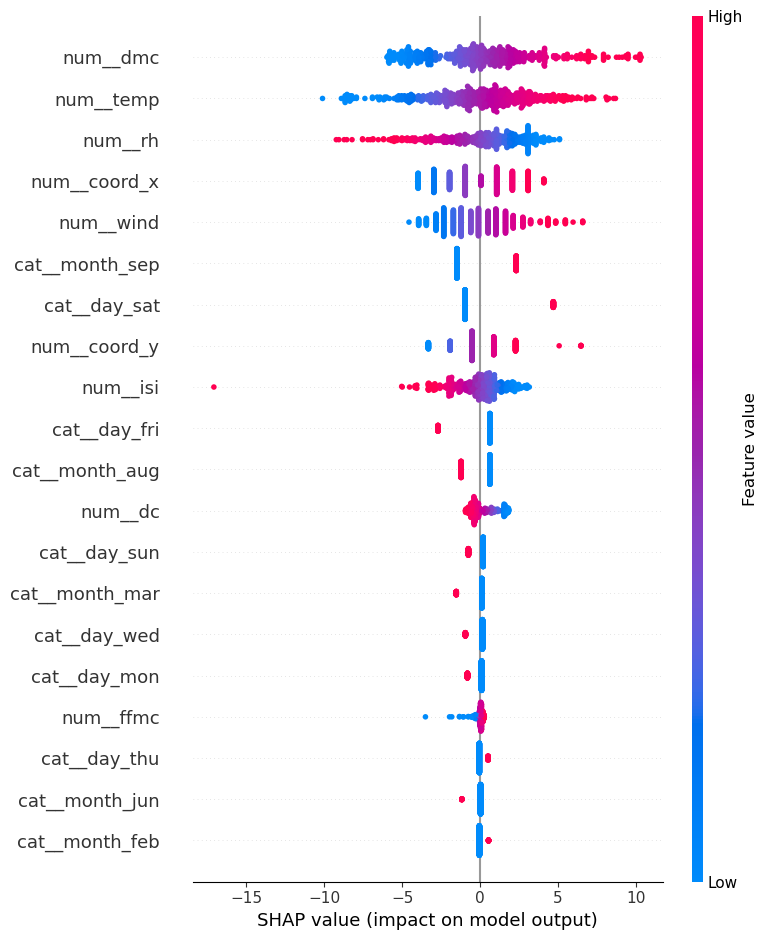

In [67]:
import shap


# Transform X for alignment 
x_transformed = pipeline_A['preprocessing'].transform(x)

# Retrieve feature names after transformation 
feature_names = pipeline_A['preprocessing'].get_feature_names_out()

# Set up SHAP explainer
explainer = shap.LinearExplainer(pipeline_A['regressor'], x_transformed)
shap_values = explainer.shap_values(x_transformed)

# Plot summary
shap.summary_plot(shap_values, x_transformed, feature_names=feature_names)

# --- Single observation view ---

# Select an observation index (e.g., the first observation) to explain a specific prediction
observation_index = 0  

# Generate the SHAP force plot for this specific observation
shap.force_plot(
    explainer.expected_value,
    shap_values[observation_index, :],
    x_transformed[observation_index, :],
    feature_names=feature_names
)




Question 1: 

This single observation is the model's baseline prediction. Red indicates increased prediction rates. Whereas blue indicates lower prediction rates.

The top 2 important features in this observation are 1 and 2. As seen in red, these have a strong positive impact on the prediction rate. Conversely, 3 and 4, are also significant features. With the most negative impact (blue) on the prediction rate. 

It's the balance of these 4 features that provide the most accuracy on this particular observation.


Question 2: 

The higher up on this model, the more it increases and impacts prediction positevely.  When interpreting, we would rely more on the features at the top. 

The features listed toward the bottom, have negative or little impact on prediction.  The blue features at the bottom may possibly even be removed considering their low impact on the prediction and we needed to simply the model more.




## Criteria

The [rubric](./assignment_3_rubric_clean.xlsx) contains the criteria for assessment.

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.